In [32]:
import numpy as np
import pylab as plt

from IPython.display import Audio, display
def play(x, fs):
    display(Audio(x, rate=fs))
    
plt.rcParams["figure.figsize"] = (8,2)
plt.rcParams["figure.dpi"] = 150

# Дискретные сигналы

Сигналом обычно называют то, что несет в себе какие-то данные. По большей
части сигналы передают информацию о состоянии или поведении физической
системы. На математическом языке сигналы — это функции одной или более независимых переменных. По общему соглашению независимой переменной в математическом представлении сигнала
выступает время, хотя в отдельных примерах независимая переменная в сигнале
фактически временем не является.

Независимая переменная в математической реализации сигнала может быть
как непрерывной, так и дискретной. 

## Аналоговые сигналы
Сигналы с непрерывным временем определяются на непрерывных промежутках, зависят от непрерывной переменной и
обычно называются аналоговыми. 

$x_a = x_a(t), t\in\rm I\!R$


## Дискретные сигналы
Сигналы с дискретным временем, или просто
дискретные сигналы, определены в дискретные моменты времени и, как следствие, имеют независимую переменную с дискретными значениями. Тем самым
они отождествляются с числовыми последовательностями. 

$x = \{x[n]\},\ -\infty < n < \infty $, $n \in Z$

Далее дискретные сигналы будут обозначаться как $x[n]$


## Примеры
### Случайный сигнал


Text(0, 0.5, 'x[n]')

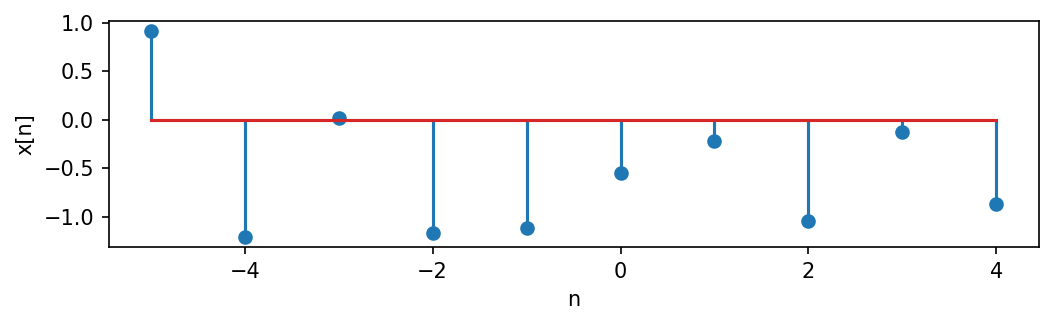

In [38]:
n = np.arange(-5, 5)
x1 = np.random.normal(size=10)

plt.stem(n, x1, use_line_collection=True)
plt.xlabel('n')
plt.ylabel('x[n]')

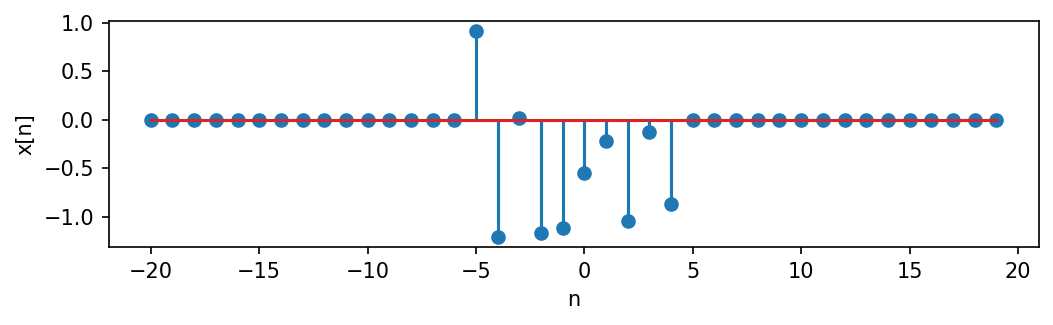

In [40]:
n = np.arange(-20, 20)
x = np.zeros(len(n))
x[(n>=-5) & (n<5)] = x1

# x[n] = const
# x[n] = n^2

plt.stem(n, x, use_line_collection=True)
plt.xlabel('n')
plt.ylabel('x[n]')
pass

### Звуковой сигнал

0.6919727891156463

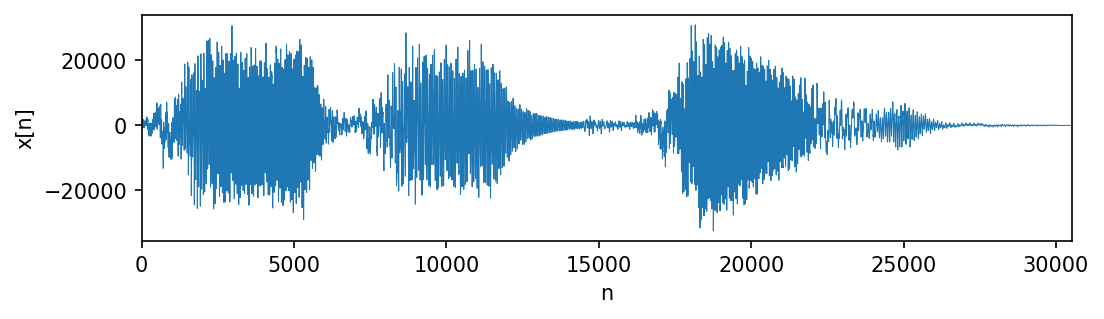

In [49]:
from scipy.io.wavfile import read, write

fs, x = read('../data/cw_flute_shot091.wav')
n = np.arange(len(x))
x = x[:, 0] # запись правого канала

plt.plot(n, x, linewidth=0.5)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.xlim(0, len(x))
fs
len(x)/fs

In [50]:
play(x, fs)

(0.0, 30516.0)

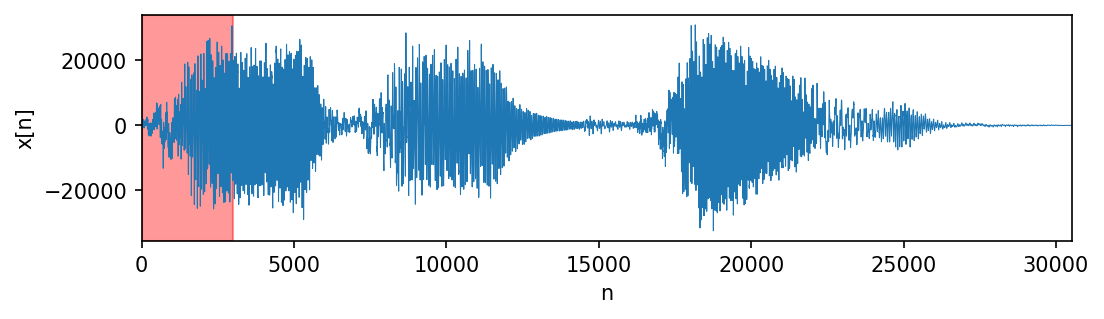

In [51]:
plt.plot(n, x, linewidth=0.5)
plt.xlabel('n')
plt.ylabel('x[n]')

n2 = 3000
plt.axvspan(0, n2, color='r', alpha=0.4)
plt.xlim(0, len(x))

In [52]:
play(x[n < n2], fs)

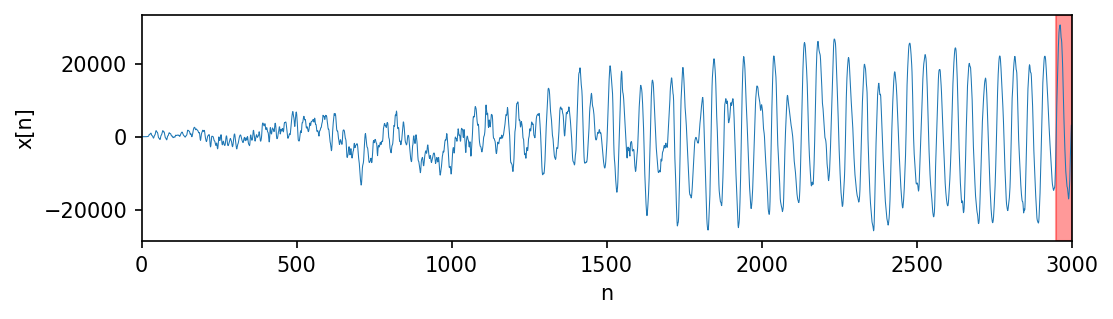

In [8]:
plt.plot(n[n < n2], x[n < n2], linewidth=0.5)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.xlim(0, n2)

n1 = 2950
plt.axvspan(n1, n2, color='r', alpha=0.4)

Text(0, 0.5, 'x[n]')

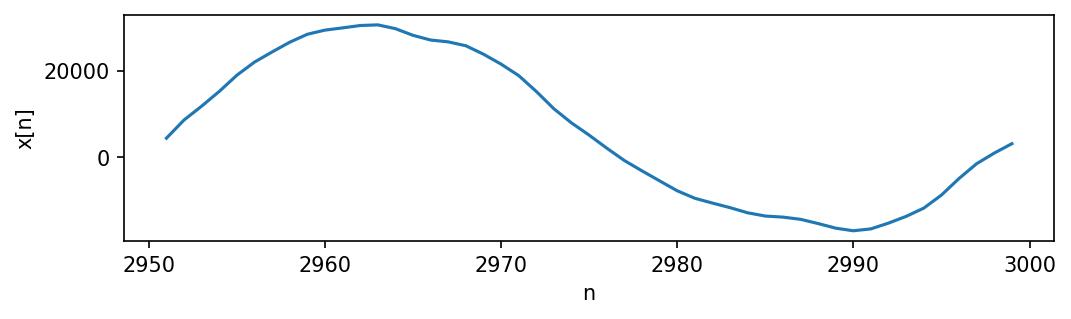

In [54]:
slc = (n>n1) & (n<n2)
x_slice = x[slc]
n_slice = n[slc]

plt.plot(n_slice, x_slice)
plt.xlabel('n')
plt.ylabel('x[n]')

[  4433   8641  11840  15250  18992  22025  24370  26618  28457  29418
  29932  30479  30627  29755  28210  27124  26698  25798  23848  21551
  18901  15232  11222   7955   5133   2128   -735  -3125  -5432  -7727
  -9459 -10568 -11630 -12816 -13564 -13814 -14323 -15302 -16369 -16974
 -16529 -15190 -13636 -11725  -8719  -4880  -1460    990   3165]


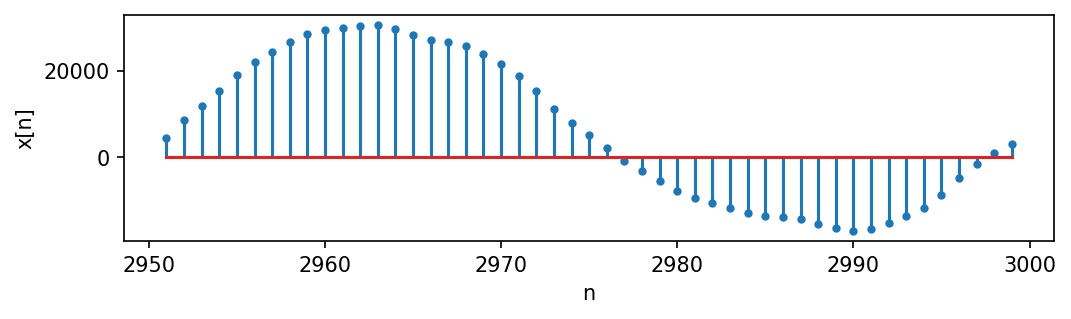

In [56]:
plt.stem(n_slice, x_slice, use_line_collection=True)[0].set_markersize(3)
plt.xlabel('n')
plt.ylabel('x[n]')
print(x_slice)

## Связь дискретных и аналоговых сигналов
На практике такие последовательности возникают, например, при преобразовании аналогового сигнала в дискретную форму. 

$x[n] = x_a(nT)$

$T$ - период(шаг) дискретезации

$f_s = 1/T$ - частота дискретезации

In [106]:
print('Fs = {} Hz\nT = {:.3f} * 10^-6 s'.format(fs, 1/fs*1e6))
play(x, fs)
print("Fs'= Fs//2")
play(x, fs//2)
print("Fs''= Fs*2")
play(x, fs*2)

Fs = 44100 Hz
T = 22.676 * 10^-6 s


Fs'= Fs//2


Fs''= Fs*2


(0.0, 0.6919727891156463)

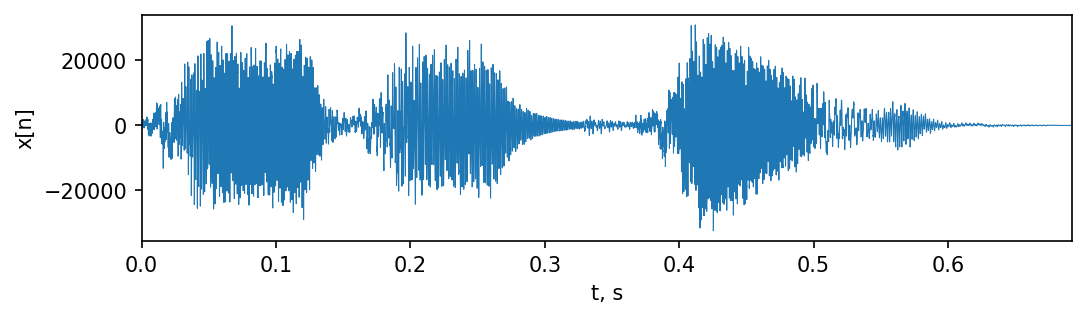

In [64]:
t = n/fs

plt.plot(t, x, linewidth=0.5)
plt.xlabel('t, s')
plt.ylabel('x[n]')
plt.xlim(0, len(x)/fs)

In [66]:
n, t

(array([    0,     1,     2, ..., 30513, 30514, 30515]),
 array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
        6.91904762e-01, 6.91927438e-01, 6.91950113e-01]))

Text(0, 0.5, 'x[n]')

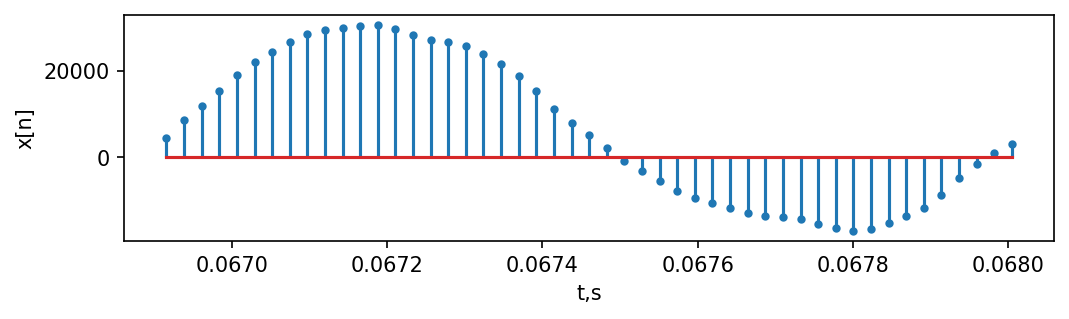

In [13]:
plt.stem(n_slice/fs, x_slice, use_line_collection=True)[0].set_markersize(3)
plt.xlabel('t,s')
plt.ylabel('x[n]')

In [60]:
t1 =  n_slice[-1]/fs - n_slice[0]/fs
f1 = 1/t1
print('Период ~= {:.4f}s'.format(t1))
print('Частота ~= {:.3f}Hz'.format(f1))

Период ~= 0.0011s
Частота ~= 918.750Hz


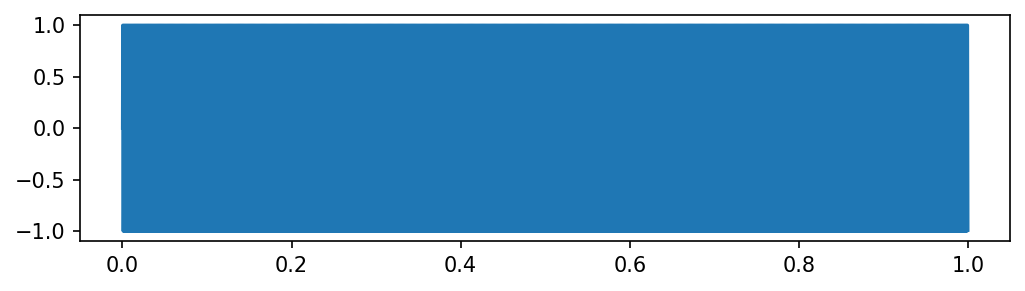

In [76]:
time = np.arange(fs)/fs
y = np.sin((2*np.pi*f1)*time)
plt.plot(time, y)

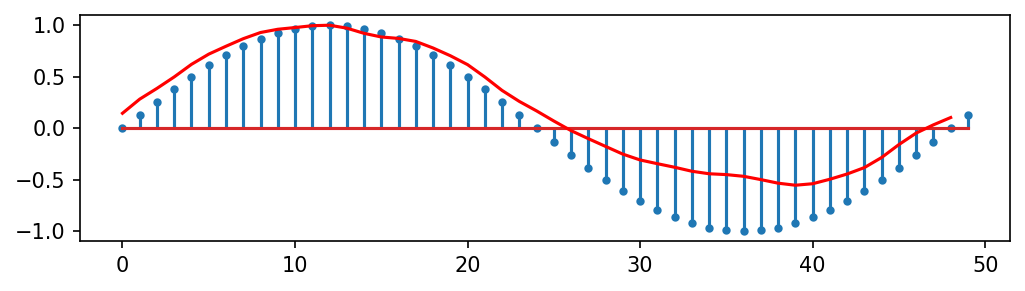

In [83]:
time = np.arange(n2-n1)/fs
x_sim = np.sin((2*np.pi*f1)*time)
plt.stem(x_sim, use_line_collection=True)[0].set_markersize(3)
plt.plot(x_slice/np.max(x_slice), 'r')


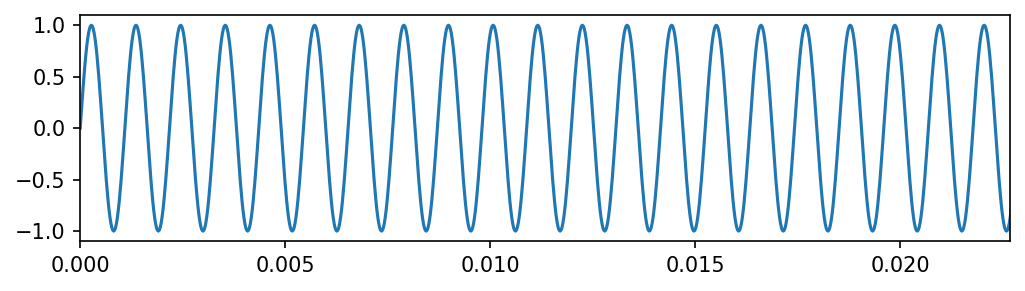

In [85]:
t = n/fs
x_sim = np.sin(2*np.pi*f1*t)

plt.plot(t, x_sim)
plt.xlim(0, 1000/fs)
play(x_sim, fs)
play(np.concatenate(10*[x[n < n2]]), fs)

(0.0, 1300.0)

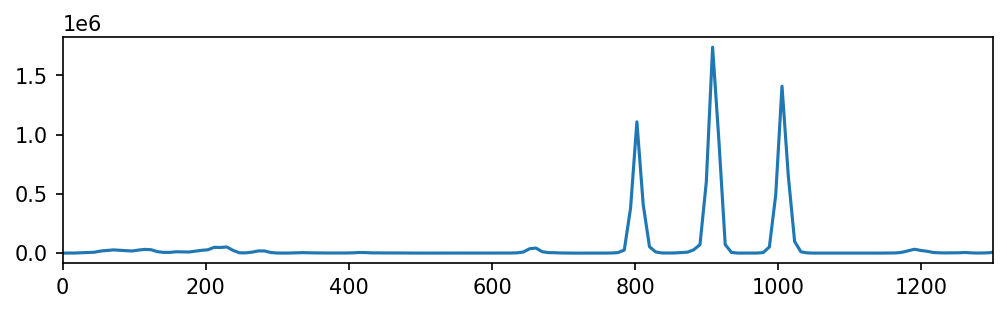

In [86]:
from scipy.signal import welch
plt.plot(*welch(x, fs, nperseg=5000))
plt.xlim(0, 1300)

array([0., 0., 0., ..., 0., 0., 0.])

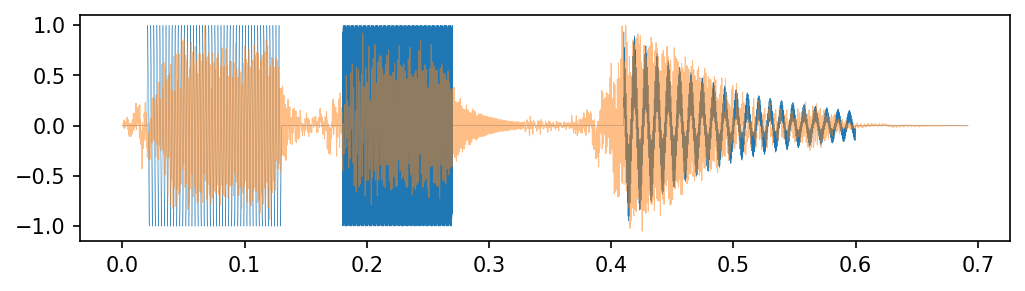

In [94]:
x_sim2 = np.zeros(len(x))*0
x_sim2[(t>0.02) & (t<0.13)] = np.sin(2*np.pi*400*t[(t>0.02) &(t<0.13)])
x_sim2[(t>0.18) & (t<0.27)] = np.sin(2*np.pi*9004*t[(t>0.18) & (t<0.27)])
x_sim2[(t>0.41) & (t<0.6)] = (np.sin(2*np.pi*108*t[(t>0.41) & (t<0.6)])*0.6 
                              + np.sin(2*np.pi*1660*t[(t>0.41) & (t<0.6)])*0.4)
x_sim2[(t>0.41) & (t<0.6)] *= 0.41**5/t[(t>0.41) & (t<0.6)]**5


plt.plot(t, x_sim2, linewidth=0.2)
plt.plot(t, x/max(x), alpha=0.5, linewidth=0.5)

play(x, fs)
play(x_sim2, fs)

x_sim2

In [95]:
print('x')
play(x, fs)
print('reversed(x)')
play(x[::-1], fs)
print('-x')
play(-x, fs)

x


reversed(x)


-x


In [97]:
x1 =  [x[(t>0.04) & (t<0.1)]]*4
x1 += [x[(t>0.4) & (t<0.46)]]*4 
x1 += [x[(t>0.24) & (t<0.3)]]*8
play(np.concatenate(x1), fs//6)

## Базовые сигналы
### Еденичный испульс  (unit sample)
$\delta[n] = \begin{cases}
0, n\ne0,\\
1, n=0\\
\end{cases}$

Text(0, 0.5, 'x[n]')

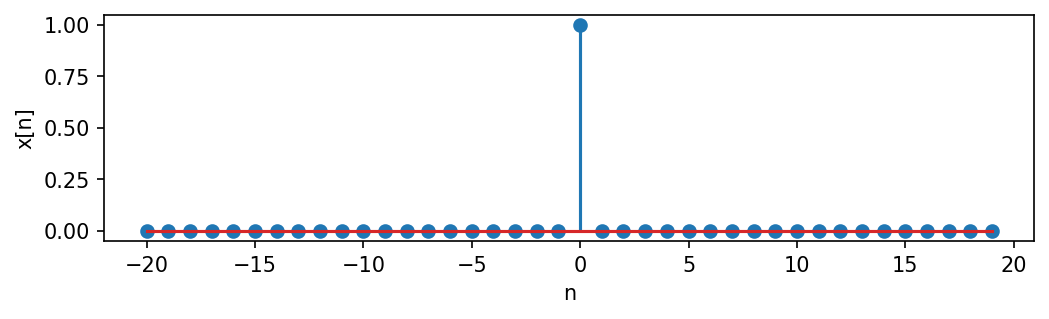

In [98]:
n = np.arange(-20, 20)
delta_n = (n==0).astype(int)

plt.stem(n, delta_n, use_line_collection=True)
plt.xlabel('n')
plt.ylabel('x[n]')


Операция сдвига:

$\delta[n-k] = \begin{cases} 0, n-k\ne0,\\ 1, n-k=0\\ \end{cases} = 
\begin{cases} 0, n\ne k,\\ 1, n=k\\ \end{cases}$

<StemContainer object of 3 artists>

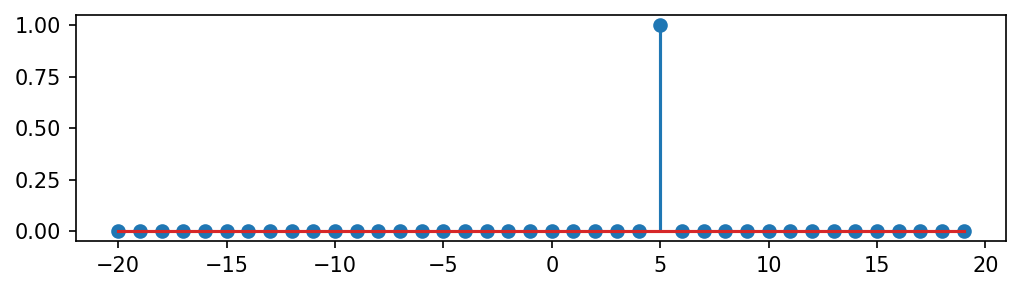

In [103]:
def delta_n_minus_k(k):
    return (n==k).astype(int)

plt.stem(n, delta_n_minus_k(5), use_line_collection=True)

Любую последовательность можно представить в виде суммы взвешенных еденичных импульсов:

$x[n] = \sum_{k=-\infty}^\infty x[k]\delta[n-k]$

<StemContainer object of 3 artists>

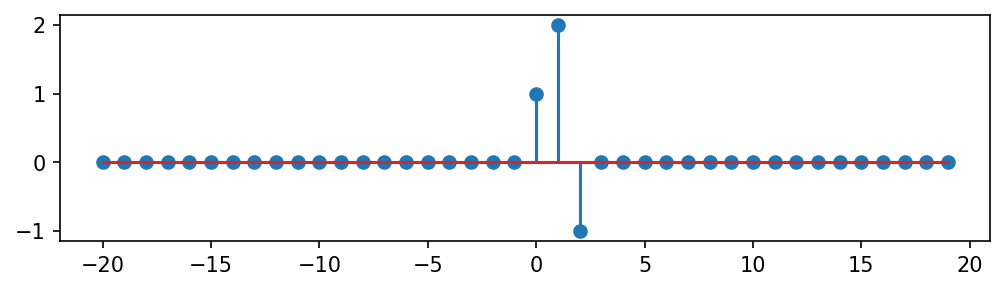

In [104]:
x_n = np.zeros(len(n))
x_n[(n>=0) & (n<3)] = [1, 2, -1]


plt.stem(n, x_n, use_line_collection=True)

<StemContainer object of 3 artists>

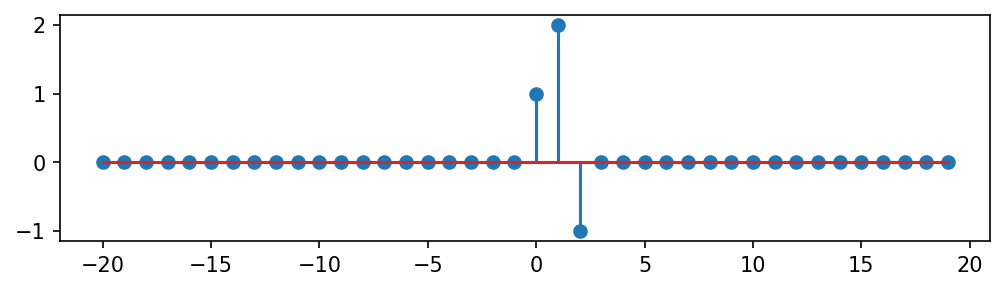

In [105]:
x2_n = np.array([x_n[n==k]*delta_n_minus_k(k) for k in n]).sum(0)


plt.stem(n, x2_n, use_line_collection=True)

### Еденичный скачок (unit step)

$u[n] = \begin{cases}
1, n\ge0,\\
0, n<0\\
\end{cases}$

Связь с еденичным испульсом:

$u[n] = \sum_{k=-\infty}^\infty u[k]\delta[n-k] = \sum_{k=0}^\infty \delta[n-k]$

Представление еденичного испульса через еденичные скачки:

$\delta[n] = u[n] - u[n-1]$

In [89]:
u_n = (n>=0).astype(int)
u_nm1 = (n-1>=0).astype(int)

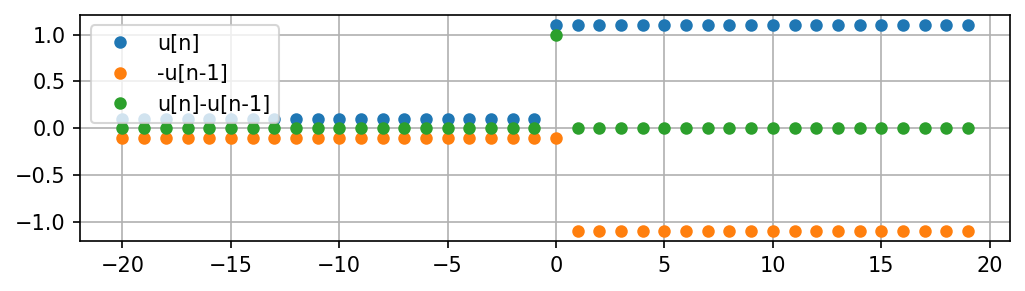

In [90]:
plt.plot(n, u_n+0.1, 'o', label='u[n]', markersize=5)
plt.plot(n, -u_nm1-0.1, 'o', label='-u[n-1]', markersize=5)
plt.plot(n, u_n-u_nm1, 'o', label='u[n]-u[n-1]', markersize=5)
plt.grid()
plt.legend(loc='upper left')